In [1]:
import cv2
import sys
sys.path.append("..")
from skimage import data, measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from semif_utils import get_component_props, crop_cutouts
from datasets import CUTOUT_PROPS
import json

In [5]:
imgp = "/home/admin_mkutugata/SemiF-AnnotationPipeline/data/results/NC_Test_/labeled_mask1023.png"
mask = cv2.imread(imgp)

## Get Component Stats

In [6]:
labels = measure.label(mask[:,:,0], connectivity=2)
props_dict = measure.regionprops_table(labels, properties=CUTOUT_PROPS)
df = pd.DataFrame(props_dict)
df

,area,area_bbox,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,eccentricity,equivalent_diameter_area,extent,feret_diameter_max,label,perimeter,perimeter_crofton,solidity
0,73071,168960,84,395,612,715,340.621396,543.757907,0.918973,305.019486,0.432475,550.676856,1,2007.488599,1905.900052,0.662325
1,4523,6174,399,1215,525,1264,463.965731,1243.147690,0.902518,75.887169,0.732588,126.063476,2,304.202056,291.279500,0.985403
2,1,1,464,1214,465,1215,464.000000,1214.000000,0.000000,1.128379,1.000000,1.000000,3,0.000000,2.681517,1.000000
3,1,1,465,1214,466,1215,465.000000,1214.000000,0.000000,1.128379,1.000000,1.000000,4,0.000000,2.681517,1.000000
4,1,1,466,1214,467,1215,466.000000,1214.000000,0.000000,1.128379,1.000000,1.000000,5,0.000000,2.681517,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,1,525,1261,526,1262,525.000000,1261.000000,0.000000,1.128379,1.000000,1.000000,106,0.000000,2.681517,1.000000
106,1,1,525,1262,526,1263,525.000000,1262.000000,0.000000,1.128379,1.000000,1.000000,107,0.000000,2.681517,1.000000
107,1,1,525,1263,526,1264,525.000000,1263.000000,0.000000,1.128379,1.000000,1.000000,108,0.000000,2.681517,1.000000
108,79880,175500,571,93,1111,418,843.942539,263.547158,0.943383,318.914369,0.455157,575.920133,109,2013.128209,1911.246738,0.685436


In [ ]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [27]:
with open("cutout.json", 'w') as outfile:
    json.dump(props_dict, outfile, indent=4, cls=NumpyEncoder)

## Selected individual cutouts

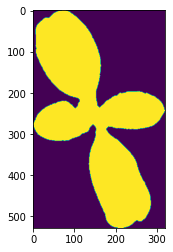

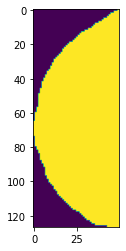

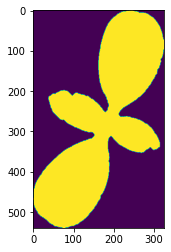

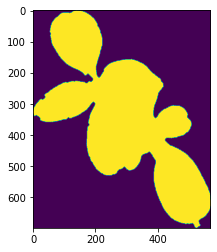

In [22]:
mask = mask.astype(np.uint8)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask[:,:,0], connectivity=8)
nb_components = nb_components - 1
list_filtered_masks = []
for i in range(0, nb_components):
    filtered_mask = np.zeros((output.shape))
    filtered_mask[output == i + 1] = 255
    list_filtered_masks.append(filtered_mask)
for mas in list_filtered_masks:
    plt.imshow(crop_cutouts(mas))
    plt.show()